In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('2019.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
X = happines_data[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = happines_data['Score']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Support Vector Regression

In [10]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf',
              C=1.2, 
              gamma=6.4)

svr_rbf.fit(X_train, y_train)

print(f"""train: {svr_rbf.score(X_train, y_train)}\ntest: {svr_rbf.score(X_test, y_test)}""")

train: 0.9228993842645433
test: 0.7572888568233156


In [12]:
svr_lin = SVR(kernel='linear', 
              C=10)

svr_lin.fit(X_train, y_train)

print(f"""train: {svr_lin.score(X_train, y_train)}\ntest: {svr_lin.score(X_test, y_test)}""")

train: 0.7963492105150525
test: 0.6439971199464435


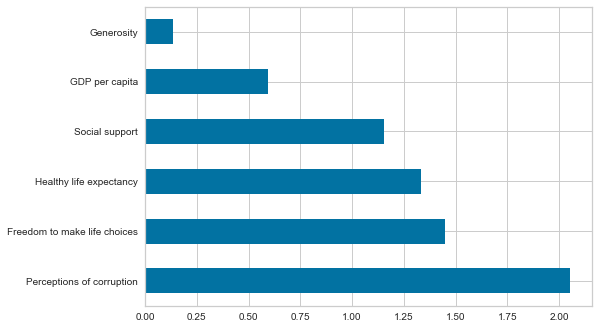

In [25]:
pd.Series(abs(svr_lin.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

In [29]:
svr_poly = SVR(kernel='poly', 
               C=10, 
               degree=4)

svr_poly.fit(X_train, y_train)

print(f"""train: {svr_poly.score(X_train, y_train)}\ntest: {svr_poly.score(X_test, y_test)}""")

train: 0.8475690923530118
test: 0.7452699566729089


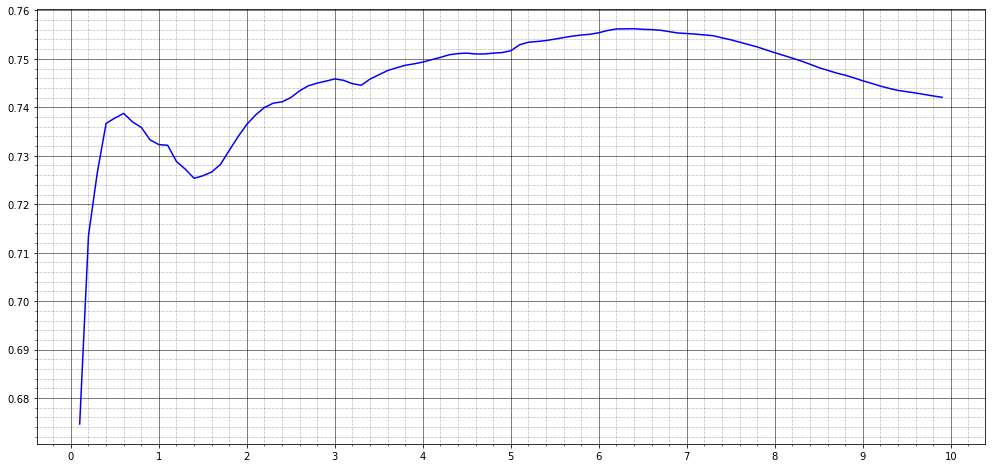

In [11]:
gamma = np.arange(0.1, 10, 0.1)
# gamma = [0.1, 1, 10, 100]
results = []

for feature in gamma:
    dt = SVR(kernel='rbf', gamma=feature)
    dt.fit(X_train, y_train)
        
    results.append(dt.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(gamma, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

In [15]:
results = []
gammas=[]

for i in np.arange(0.1,10,0.1):
    nnm = SVR(kernel='rbf',gamma=i)
    nnm.fit(X_train, y_train)

    results.append(nnm.score(X_test, y_test))
    gammas.append(i)
    
print(max(results))
print(results.index(max(results)))
print(results[results.index(max(results))])

print(gammas[results.index(max(results))])

0.7562171507111417
63
0.7562171507111417
6.4


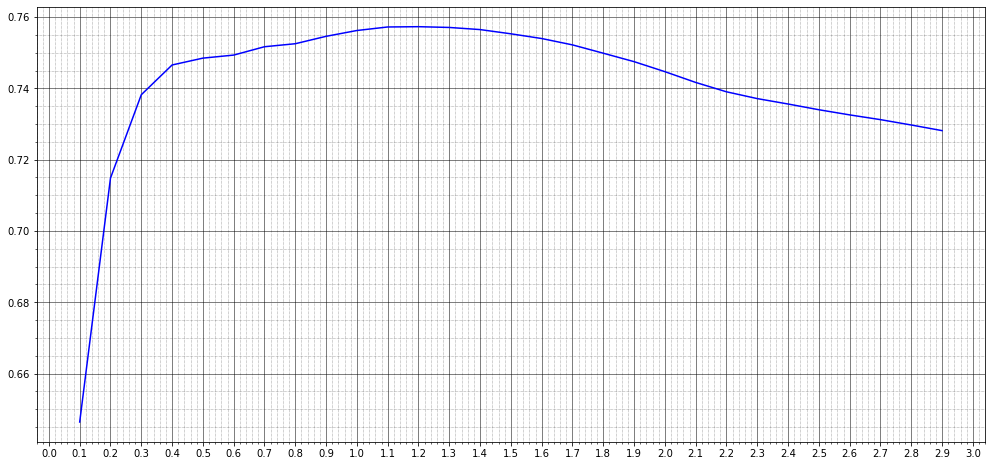

In [60]:
cs = np.arange(0.1, 3, 0.1)
# cs = [0.1, 1, 10, 100, 1000]
results = []

for feature in cs:
    dt = SVR(kernel='rbf', C=feature, gamma=6.4)
    dt.fit(X_train, y_train)
        
    results.append(dt.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(cs, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))

In [61]:
print(results[results.index(max(results))])
print(cs[results.index(max(results))])

0.757288856823313
1.2000000000000002
